# Communicate data findings project 
## by Ahmed El Samadony

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.shape

(519700, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
df[['duration_sec','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']].describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236
std,3444.146451,0.086305,0.105573,0.086224,0.105122
min,61.000000,37.317298,-122.444293,37.317298,-122.444293
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119


### What is the structure of your dataset?

The data set consists of 519700 rows and 13 columns of different types. No rows show missing values.

### What is/are the main feature(s) of interest in your dataset?

Type of user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Dduration of rides, start and end times and location of start and end stations might have distinct relationships with the user_type and with each other.

In [7]:
df['duration_sec'].describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

<span style="color:blue"> The duration being in seconds is difficult to interpret. We'd better convert it to minutes.

In [8]:
df['duration'] = df['duration_sec'] / 60

In [9]:
df['duration'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration, dtype: float64

In [10]:
df['duration'].max()/60

23.991388888888888

<span style="color:blue"> The duration of rides ranges from just over one minute to almost one day

In [11]:
#convert start and end times to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

<span style="color:blue"> Add a new column of the calculated duration of rides based on start and end times:

In [12]:
df['calc_duration'] = (df['end_time'] - df['start_time']).astype('timedelta64[s]')

In [13]:
df['calc_duration'].describe()

count    519700.000000
mean       1098.940250
std        3442.943384
min       -3308.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: calc_duration, dtype: float64

<span style="color:blue"> The mean and std are different from the original duration_sec column. The minimum value is negative.However, all the other quartiles are the same as the original duration_sec column.

In [14]:
#rows where the calculated duration doesn't equal the original duration
df[df['duration_sec'] != df['calc_duration']].shape[0]

10

In [15]:
#a data frame of those rows
wrong_time = df[df['duration_sec'] != df['calc_duration']][['duration_sec', 'calc_duration']]

In [16]:
wrong_time

,duration_sec,calc_duration
166700,84640,81040.0
166867,62041,58441.0
167041,80721,77121.0
167167,74738,71138.0
167577,68144,64544.0
167624,58182,54582.0
167634,73646,70046.0
167647,73212,69612.0
167759,51434,47834.0
167801,292,-3308.0


In [17]:
#column of the difference between the original and calculated durations
wrong_time['diff'] = wrong_time['duration_sec'] - wrong_time['calc_duration']

In [18]:
wrong_time

,duration_sec,calc_duration,diff
166700,84640,81040.0,3600.0
166867,62041,58441.0,3600.0
167041,80721,77121.0,3600.0
167167,74738,71138.0,3600.0
167577,68144,64544.0,3600.0
167624,58182,54582.0,3600.0
167634,73646,70046.0,3600.0
167647,73212,69612.0,3600.0
167759,51434,47834.0,3600.0
167801,292,-3308.0,3600.0


<span style="color:blue"> We notice that all the wrong durations are less than the original duration by 1 hour. We correct this mistake by adding 1 hour to the corresponding end_times:

In [19]:
df.loc[df.index.isin(wrong_time.index), 'end_time'] +=  pd.DateOffset(hours=1)

In [20]:
df[df['duration_sec'] != (df['end_time'] - df['start_time']).astype('timedelta64[s]')].shape[0]

0

In [21]:
#drop calc_duration column since we no longer need it
df.drop('calc_duration', axis = 1, inplace = True)

In [22]:
#A new column of the year of each ride
df['year'] = df['start_time'].dt.year

In [23]:
df.year.unique()

array([2017])

In [24]:
#All rides occur in 2017. We don't need the year column
df.drop('year', axis = 1, inplace = True)

In [25]:
#A new column of the month of the ride
df['month'] = df['start_time'].dt.month_name()

In [26]:
df.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June'], dtype=object)

<span style="color:blue"> This table includes rides made during the second half of the year

In [27]:
#A new column of the day of the ride
df['day'] = df['start_time'].dt.day_name()

In [28]:
df.day.unique()

array(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday',
       'Monday'], dtype=object)

<span style="color:blue"> Rides occur throughout the whole week

In [29]:
#A new column of the starting hour of the ride
df['hour'] = df['start_time'].dt.hour

In [30]:
df.hour.nunique()

24

<span style="color:blue"> Rides occur throughout the whole day

In [31]:
df['start_station_id'].nunique()

272

In [32]:
df['start_station_name'].nunique()

272

In [33]:
df['start_station_latitude'].nunique()

272

In [34]:
df['start_station_longitude'].nunique()

272

<span style="color:blue"> There are 272 starting_stations. Each has a unique id and location coordinates

In [35]:
#checking if any name and id are mismatched in any row
(df.groupby('start_station_name')['start_station_id'].nunique() != 1).sum()

0

In [36]:
#checking if any name and latitude are mismatched in any row
(df.groupby('start_station_name')['start_station_latitude'].nunique() != 1).sum()

0

In [37]:
#checking if any name and longitude are mismatched in any row
(df.groupby('start_station_name')['start_station_longitude'].nunique() != 1).sum()

0

<span style="color:blue"> We do the same for the end_stations:

In [38]:
df['end_station_id'].nunique()

272

In [39]:
df['end_station_name'].nunique()

272

In [40]:
df['end_station_latitude'].nunique()

272

In [41]:
df['end_station_longitude'].nunique()

272

In [42]:
(df.groupby('end_station_name')['end_station_id'].nunique() != 1).sum()

0

In [43]:
(df.groupby('end_station_name')['end_station_latitude'].nunique() != 1).sum()

0

In [44]:
(df.groupby('end_station_name')['end_station_longitude'].nunique() != 1).sum()

0

In [45]:
#Checking if the start and end stations are the same:
set(df['end_station_id'].unique()) == set(df['start_station_id'].unique())

True

In [46]:
#Checking the locations of the stations
df[['start_station_latitude', 'start_station_longitude']].describe()

,start_station_latitude,start_station_longitude
count,519700.000000,519700.000000
mean,37.771653,-122.363927
std,0.086305,0.105573
min,37.317298,-122.444293
25%,37.773492,-122.411726
50%,37.783521,-122.398870
75%,37.795392,-122.391034
max,37.880222,-121.874119


<span style="color:blue"> The stations don't seem to be far from each other by coordinate degrees. However, a small degree could mean an actual long distance on Earth.

In [47]:
#function to calculate distance between 2 points by their coordinates
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [48]:
#Create a new column of the line distance between the start and end stations of each row:
df['distance'] = haversine_np(df['end_station_longitude'], df['end_station_latitude'], df['start_station_longitude'], df['start_station_latitude'])

<span style="color:blue"> Since we don't know the path of each trip, We can consider the line distance between the start and end stations as a good estimate of the length of each trip.

In [49]:
df.distance.describe()

count    519700.000000
mean          1.586080
std           1.009757
min           0.000000
25%           0.899078
50%           1.399365
75%           2.071193
max          68.143976
Name: distance, dtype: float64

<span style="color:blue"> The minimum distance is 0 km. This means that in some trips, the start and end stations are the same. <br>
The average trip distance is about 1.58 km.
The longest trip is approximately 68 km.

In [50]:
#Number of trips where the start and end stations are the same:
df[df['start_station_name'] == df['end_station_name']].shape[0]

18134

<span style="color:blue"> Only about 18 thousand out of 519 thousand trips returned to the same station

In [51]:
#Number of bikes:
df.bike_id.nunique()

3673

In [52]:
#Type of users:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [53]:
#We no longer need these columns:
df.drop(['duration_sec','start_station_id','start_station_latitude', 'start_station_longitude' , 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

## Univariate Exploration


In [54]:
df.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,duration,month,day,hour,distance
0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,96,Customer,1335.166667,December,Sunday,16,0.942339
1,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,88,Customer,1313.333333,December,Sunday,15,3.067800
2,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,Downtown Berkeley BART,Downtown Berkeley BART,1094,Customer,762.800000,December,Sunday,22,0.000000
3,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,8th St at Ringold St,Powell St BART Station (Market St at 5th St),2831,Customer,1036.200000,December,Sunday,17,1.045965
4,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,3167,Subscriber,726.716667,December,Sunday,14,0.635940


## <span style="color:blue"> We investigate each column separately:

### <span style="color:blue"> Duration

In [55]:
df.duration.describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration, dtype: float64

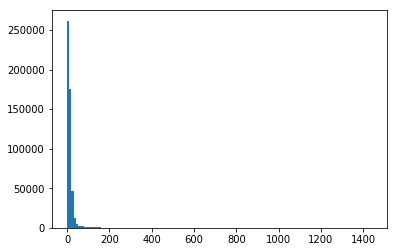

In [56]:
plt.hist(data = df, x = 'duration', bins = np.arange(0, 1450, 10));

<span style="color:blue"> The duration curve is extremely right_skewed. We need to logarithmically transform the column to make it easy to visualize.

In [57]:
df['duration_log'] = np.log10(df['duration'])

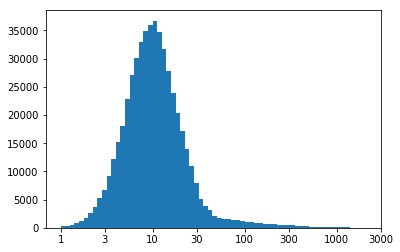

In [58]:
bin_edges =  np.arange(0, np.log10(df.duration.max())+0.1, 0.05)
plt.hist(df['duration_log'], bins = bin_edges)
tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> After log transform, the duration curve follows normal distribution with a peak at about 10 minutes.

### <span style="color:blue"> Distance

<span style="color:blue"> Since there are about 18 thousand trips where distance is 0, we need to exclude them:

In [59]:
#new dataframe where the start and end stations are different. We will use it whenever distance is involved.
df_leave = pd.DataFrame(df[df['start_station_name'] != df['end_station_name']])

In [60]:
df_leave.distance.describe()

count    501566.000000
mean          1.643425
std           0.980934
min           0.013279
25%           0.950225
50%           1.425118
75%           2.087145
max          68.143976
Name: distance, dtype: float64

<span style="color:blue"> The smallest distance is as little as 13 meters while the longest distance is 68 km.

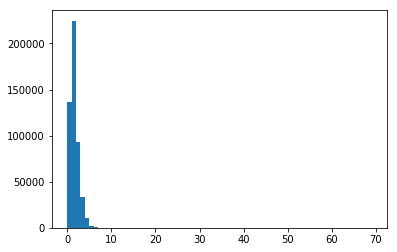

In [61]:
plt.hist(data = df_leave, x = 'distance', bins = np.arange(0, 70, 1));

<span style="color:blue"> Like the duration curve, the distance curve is extremely right_skewed. We need to logarithmically transform the column to make it easy to visualize.

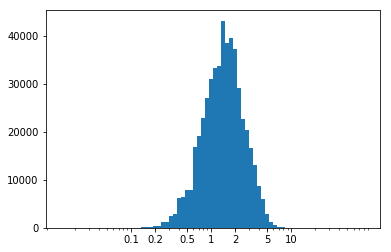

In [62]:
bin_edges = 10 ** np.arange(np.log10(df_leave.distance.min()), np.log10(df_leave.distance.max())+0.1, 0.05)
plt.hist(df_leave['distance'], bins = bin_edges)
plt.xscale('log')
tick_locs = [0.1, 0.2, 0.5, 1, 2, 5, 10]
plt.xticks(tick_locs, tick_locs);

<span style="color:blue"> After log transform, the distance curve follows normal distribution with a peak at distances between 1-2 km.

### <span style="color:blue"> User_type

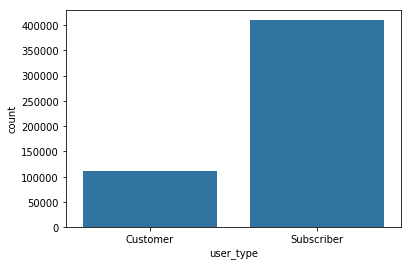

In [63]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color);

<span style="color:blue"> about 4/5 of the users are subscribers.

### <span style="color:blue"> Month

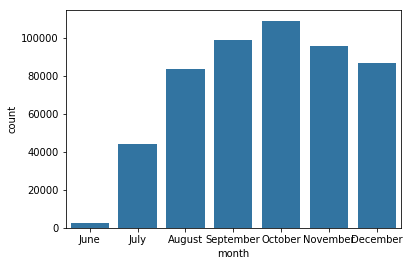

In [64]:
month_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'month', color = base_color, order = month_order);

In [65]:
df.tail()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,duration,month,day,hour,distance,duration_log
519695,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,Berry St at 4th St,5th St at Howard St,400,Subscriber,7.250000,June,Wednesday,10,1.236409,0.860338
519696,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,3rd St at Townsend St,5th at Folsom,316,Subscriber,7.183333,June,Wednesday,9,0.920610,0.856326
519697,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,Montgomery St BART Station (Market St at 2nd St),2nd St at S Park St,240,Subscriber,7.066667,June,Wednesday,9,1.072082,0.849215
519698,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,Market St at 10th St,S Van Ness Ave at Market St,669,Subscriber,6.100000,June,Wednesday,9,0.243362,0.785330
519699,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,Howard St at 2nd St,2nd St at S Park St,117,Subscriber,3.133333,June,Wednesday,9,0.702020,0.496007


<span style="color:blue"> The table only covers the last days of June. We will exclude June from the analysis. <br>
    October is the month with the most rides with a peak at over 100 thousand rides.

In [66]:
month_order = [ 'July', 'August', 'September', 'October', 'November', 'December']

### <span style="color:blue"> Day

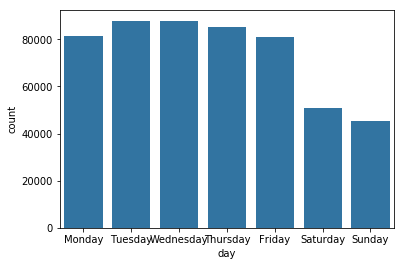

In [67]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day', color = base_color, order = day_order);

<span style="color:blue"> Most rides occur during weekdays. There are less rides during weekends.

### <span style="color:blue"> Hour

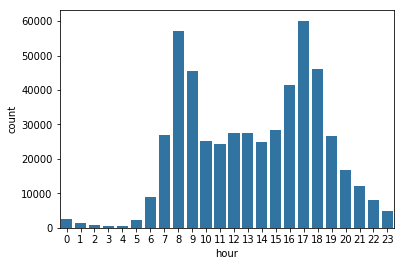

In [68]:
hour_order = np.arange(0, 24, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'hour', color = base_color, order = hour_order);

<span style="color:blue"> The hour values follow a bimodal distribution with peaks at 8 a.m and 5 p.m (the rush hours)

### <span style="color:blue"> Stations

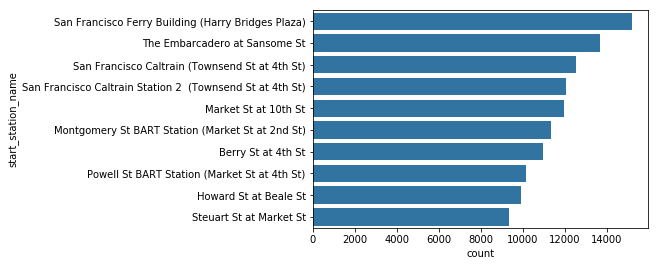

In [69]:
#10 most popular starting stations:
start_station_order = df['start_station_name'].value_counts().index 
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = start_station_order)
plt.ylim(9.5);

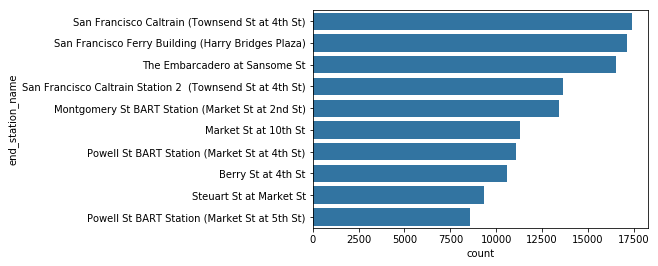

In [70]:
#10 most popular destinations:
end_station_order = df['end_station_name'].value_counts().index 
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = end_station_order)
plt.ylim(9.5);

<span style="color:blue"> The most popular starting and end stations are similar. We need to find how much this is true regarding all stations and whether there is a balance between supply and demand of bikes.

In [71]:
#A dataframe of the starting stations and their counts
leaving = df['start_station_name'].value_counts().rename_axis('station_name').reset_index(name='leaving')

In [72]:
leaving.head()

,station_name,leaving
0,San Francisco Ferry Building (Harry Bridges Pl...,15187
1,The Embarcadero at Sansome St,13664
2,San Francisco Caltrain (Townsend St at 4th St),12546
3,San Francisco Caltrain Station 2 (Townsend St...,12055
4,Market St at 10th St,11960


In [73]:
#A dataframe of the end stations and their counts
arriving = df['end_station_name'].value_counts().rename_axis('station_name').reset_index(name='arriving')

In [74]:
arriving.head()

,station_name,arriving
0,San Francisco Caltrain (Townsend St at 4th St),17378
1,San Francisco Ferry Building (Harry Bridges Pl...,17109
2,The Embarcadero at Sansome St,16531
3,San Francisco Caltrain Station 2 (Townsend St...,13658
4,Montgomery St BART Station (Market St at 2nd St),13443


In [75]:
stations = pd.merge(arriving, leaving, on='station_name')

In [76]:
stations['supply'] = stations['arriving'] - stations['leaving']

In [77]:
stations.supply.describe()

count     272.000000
mean        0.000000
std       537.998772
min     -2135.000000
25%       -76.000000
50%         2.000000
75%        79.500000
max      4832.000000
Name: supply, dtype: float64

<span style="color:blue"> Over this 6-month period, supply and demand varied greatly among different stations. <br>
Some stations had a surplus of bikes that needed to be transported to other more popular stations with higher demand. <br>
This can be adjusted by day, week or month to make sure that no station is deficient in available bikes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distance had many outliers with most trips having less than 10 km. Some trips reached nearly 70 km. <br>
> Duration and distance had right-skewed distributions that needed to be logarithmically transformed in order to visualize their distribution clearly. Their distribution was normal after the transform. <br>
> There are less trips on weekends than weekdays. <br>
> The hour distribution is bi-modal with 2 peaks at 8 am and 5 pm. <br>
> October is the month with the most rides. <br>
> About 4/5 of the users are subscribers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Duration and distance had right-skewed distributions that needed to be logarithmically transformed in order to visualize their distribution clearly. Their distribution was normal after the transform. <br>
> A new dataframe was created to measure supply and demand in different stations.

## Bivariate Exploration

In [78]:
# New columns to apply log transform on duration and distance 
df_leave['duration_log'] = df_leave['duration'].apply(np.log10)
df_leave['distance_log'] = np.log10(df_leave['distance'])

## <span style="color:blue"> We compare each pair of variables:

### <span style="color:blue"> Duration, Distance:

<span style="color:blue"> An intuitive guess would say that the longer the trip distance, the longer the duration it takes. <br>
    Let's see if it's true:

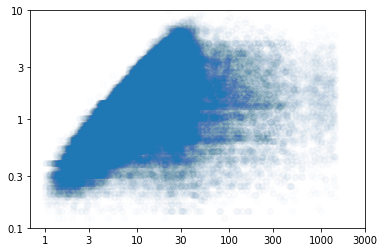

In [79]:
plt.scatter(data = df_leave, x = 'duration_log', y = 'distance_log', alpha = 0.01)

xtick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(np.log10(xtick_locs), xtick_locs);


ytick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(ytick_locs), ytick_locs);
plt.ylim(-1,1);

<span style="color:blue"> While there is a clear positive relationship, there is also overplotting and horizontal bands representing trips having the same distance but taking different durations. <br>
    There is also a clear cut-off line somewhere between 1000 and 3000 km where no trips seem to be longer than the distance at that line. (the distance between the 2 most farthest stations) <br>
    To demonstrate the positive relationship between distance and duration better, a heatmap might be useful:

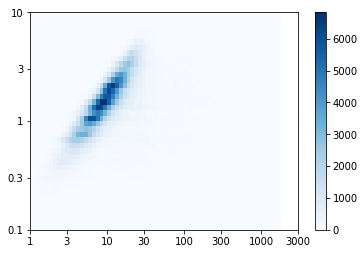

In [80]:
xbin_edges =  np.arange(0, np.log10(df_leave.duration.max())+0.1, 0.05)
ybin_edges =  np.arange(-1, np.log10(10)+0.1, 0.05)

plt.hist2d(data = df_leave, x = 'duration_log', y = 'distance_log', bins=[xbin_edges, ybin_edges] ,cmap = 'Blues')
plt.colorbar();

xtick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(np.log10(xtick_locs), xtick_locs);


ytick_locs = [0.1, 0.3 , 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(ytick_locs), ytick_locs);
plt.ylim(-1,1);

### <span style="color:blue"> User_type, Duration:

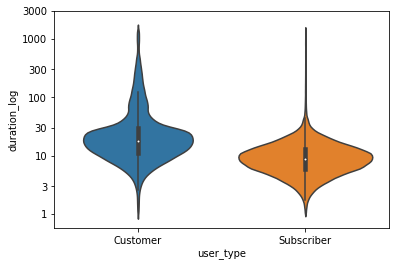

In [81]:
sb.violinplot(data = df, x = 'user_type', y = 'duration_log')
tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Subscribers tend to take less time on their trips than customers.

### <span style="color:blue"> User_type, Distance:

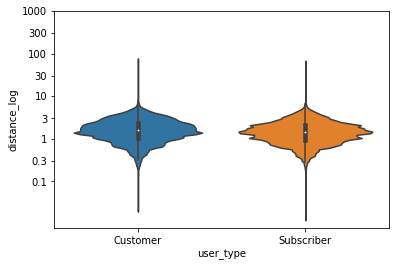

In [82]:
sb.violinplot(data = df_leave, x = 'user_type', y = 'distance_log')
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Both subscriber and customer trips are similar in distance. This might suggest that subscribers on average are faster than customers since they have similar mean distances but shorter mean duration.

### <span style="color:blue"> User_type, Hour:

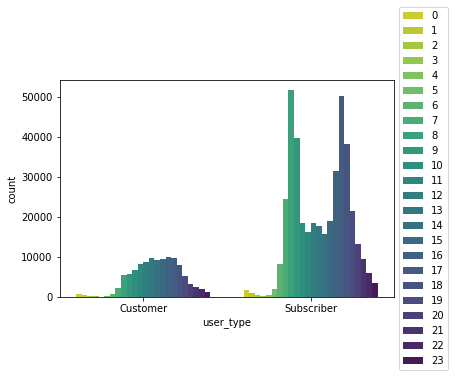

In [83]:
sb.countplot(data = df, x = 'user_type', hue = 'hour', hue_order = hour_order , palette = 'viridis_r')
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> Customer hour distribution is normal. Subscriber hour distribution is bi-modal like the univariate hour distribution.

### <span style="color:blue"> User_type, Day:

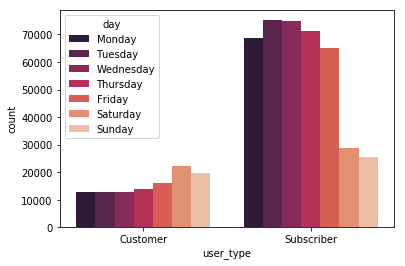

In [84]:
sb.countplot(data = df, x = 'user_type', hue = 'day', hue_order = day_order , palette = 'rocket');

<span style="color:blue"> Customers have more trips on weekends. Whereas subscribers have more trips on weekdays. <br>
    This might suggest that customers use bikes mainly for outings whereas subscribers use them mainly to go to work. Which might explain why subscriber trips take less time on average.

### <span style="color:blue"> User_type, Month:

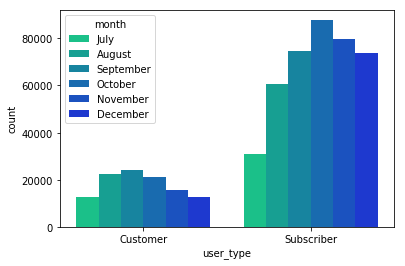

In [85]:
sb.countplot(data = df, x = 'user_type', hue = 'month', hue_order = month_order, palette = 'winter_r');

<span style="color:blue"> Customers had nearly equal trips in the 3rd and 4th quarters of the year. <br>
    Subscribers had more trips in the 4th quarter than the 3rd quarter.

### <span style="color:blue"> Hour, Duration:

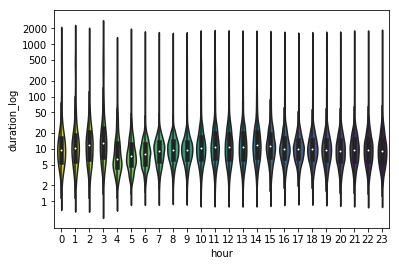

In [86]:
sb.violinplot(data = df, x = 'hour', y = 'duration_log', order = hour_order, palette = 'viridis_r')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> There seems to be a slight gradual increase in mean trip duration starting at trips that begin at the hour of 4 am and continuing throughout the day until it reaches maximum at trips that begin at 3 am. <br>
    This can be made clearer by changing the order of hours on the x axis:

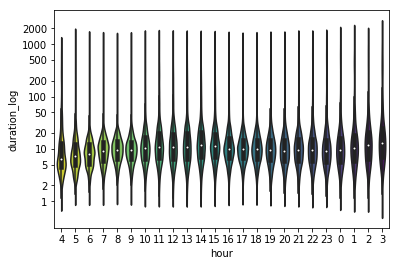

In [87]:
sb.violinplot(data = df, x = 'hour', y = 'duration_log', order = list(np.arange(4,24,1)) + [0,1,2,3], palette = 'viridis_r')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.yticks(np.log10(tick_locs), tick_locs);

### <span style="color:blue"> Hour, Distance:

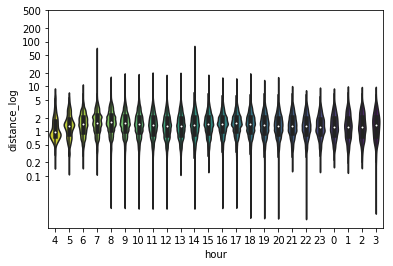

In [88]:
sb.violinplot(data = df_leave, x = 'hour', y = 'distance_log', order = list(np.arange(4,24,1)) + [0,1,2,3], palette = 'viridis_r')
tick_locs = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> A similar trend can be found in the hour/distance plot.

### <span style="color:blue"> Day, Duration:

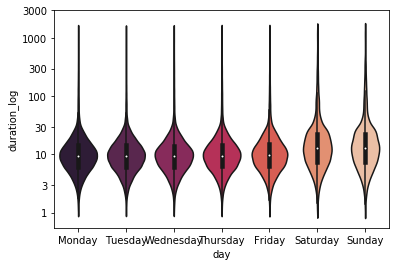

In [89]:
sb.violinplot(data = df, x = 'day', y = 'duration_log', order = day_order, palette = 'rocket')
tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Duration of trips are slightly longer on weekends. This might be explained by the observation that customers use bikes more on weekends and their trips tend to take more time on average than subscribers.

### <span style="color:blue"> Day, Distance:

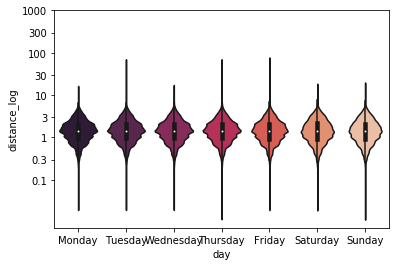

In [90]:
sb.violinplot(data = df_leave, x = 'day', y = 'distance_log', order = day_order, palette = 'rocket')
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Trip distance doesn't seem to differ much in different days of the week.

### <span style="color:blue"> Month, Duration:

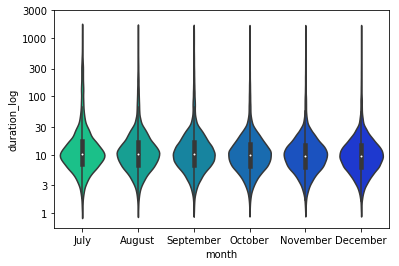

In [91]:
sb.violinplot(data = df, x = 'month', y = 'duration_log', order = month_order, palette = 'winter_r')
tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Trip duration doesn't seem to differ much in different months.

### <span style="color:blue"> Month, Distance:

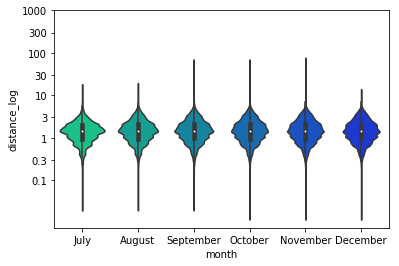

In [92]:
sb.violinplot(data = df_leave, x = 'month', y = 'distance_log', order = month_order, palette = 'winter_r')
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.yticks(np.log10(tick_locs), tick_locs);

<span style="color:blue"> Trip distance doesn't seem to differ much in different months.

### <span style="color:blue"> Day, Hour:

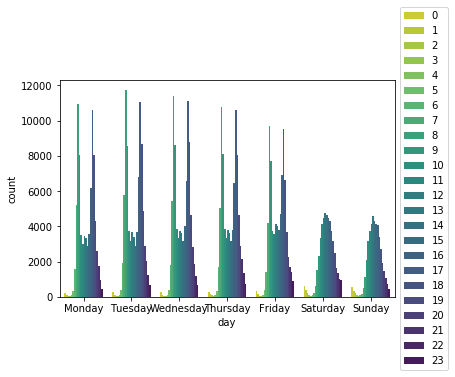

In [93]:
sb.countplot(data = df, x = 'day', hue = 'hour', order= day_order, hue_order = hour_order , palette = 'viridis_r')
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> Weekdays have the bi-modal hour distribution similar to that observed in the subscriber-hour distribution. <br>
    Wherease weekends have the normal distribution similar to that observed in the customer-hour distribution.

### <span style="color:blue"> Month, Hour:

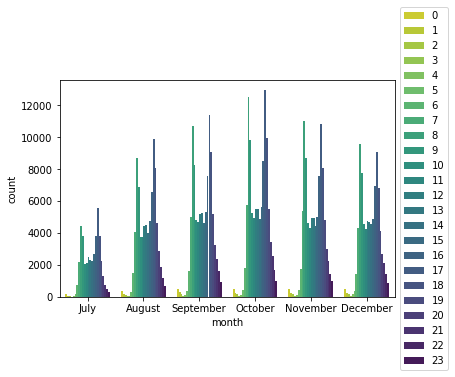

In [94]:
sb.countplot(data = df, x = 'month', hue = 'hour', order= month_order, hue_order = hour_order , palette = 'viridis_r')
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> The bi-modal hour distribution is observed throughout different months.

### <span style="color:blue"> Month, Day:

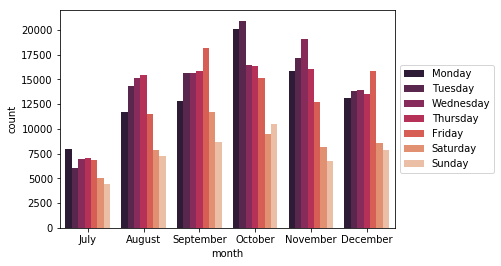

In [95]:
sb.countplot(data = df, x = 'month', hue = 'day', order = month_order, hue_order = day_order, palette = 'rocket')
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> While the busiest weekday differs throughout different months, weekends always have less trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers' and customers' trips have similar distances. <br>
> However subscribers' trips take less time on average. <br>
> Customers use bikes more on weekends, whereas subscribers use bikes more on weekdays. <br>
> Customers' hour ditribution is normal, whereas subscribers' hour distribution is bi-modal. <br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seems to be a slight gradual increase in trip duration starting at trips that begin at the hour of 4 am and continuing throughout the day until it reaches maximum at trips that begin at 3 am.

## Multivariate Exploration


## <span style="color:blue"> Comparing Duration/Distance and one categorical variable:

In [96]:
#To avoid overplotting, we make a sample dataframe:
indeces = np.random.choice(df_leave.shape[0], 10000, replace = False)
df_sample = pd.DataFrame(df_leave.loc[df_leave.index.isin(indeces),:])

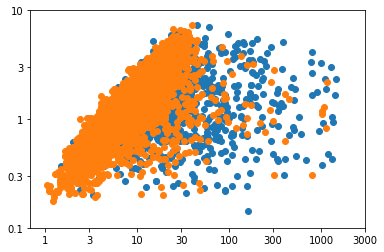

In [97]:
for user in ['Customer', 'Subscriber']:
    df_user = df_sample[df_sample['user_type'] == user]
    plt.scatter(data = df_user, x = 'duration_log', y = 'distance_log')

xtick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(np.log10(xtick_locs), xtick_locs);


ytick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(np.log10(ytick_locs), ytick_locs);
plt.ylim(-1,1);

<span style="color:blue"> Even with a smaller sample, The relationship between distance and duration is so strong that overplotting makes it difficult to compare a third variable.

## <span style="color:blue"> Comparing distance and duration in 2 subplots across the categorical variables:

### <span style="color:blue"> User_type/Hour:

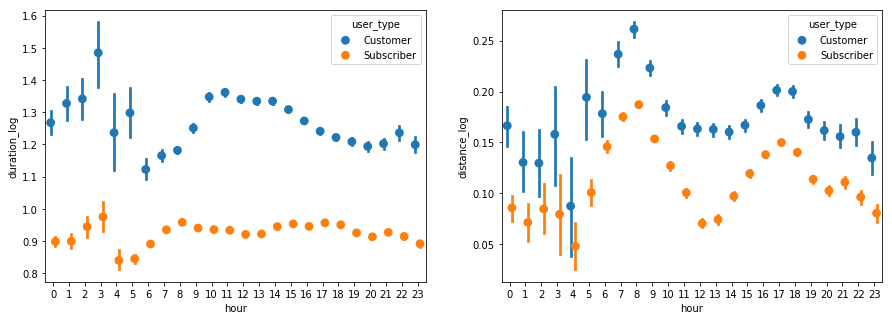

In [98]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'hour', y = 'duration_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "")

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'hour', y = 'distance_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "");

<span style="color:blue"> Except for the first hours of the day, we notice the following: <br>
    Left plot: Mean trip duration follows a shallow curve in both customers and subscribers <br>
    Right plot: The bi-modal hour distribution is evident in customers and more evident in subscribers. <br>
    This suggests that, the average user speed is higher during rush hours where the mean trip distance increases but the mean duration doesn't increase to the same degree.

### <span style="color:blue"> User_type/Day:

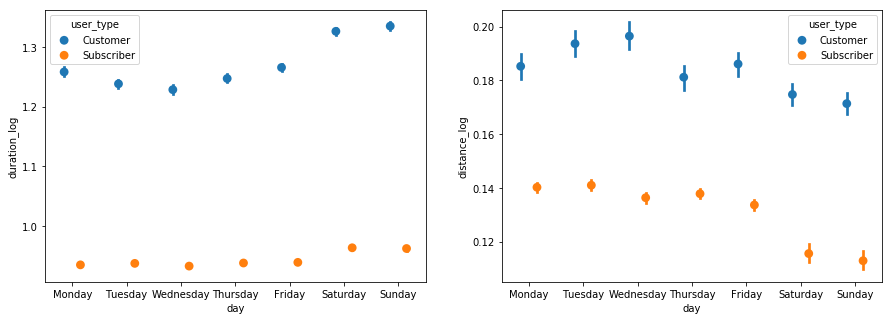

In [99]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'day', y = 'duration_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "", order = day_order)

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'day', y = 'distance_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "", order = day_order);

<span style="color:blue">

<span style="color:blue"> Left plot: Mean trip duration slightly increases in weekends in both customers and subscribers. <br>
    Right plot: Mean trip distance decreases in weekends in both customers and subscribers. <br>
    This suggests that, in weekends, users make shorter trips but take more time on average. This might be due to that these trips are probably outings.

### <span style="color:blue"> User_type/Month:

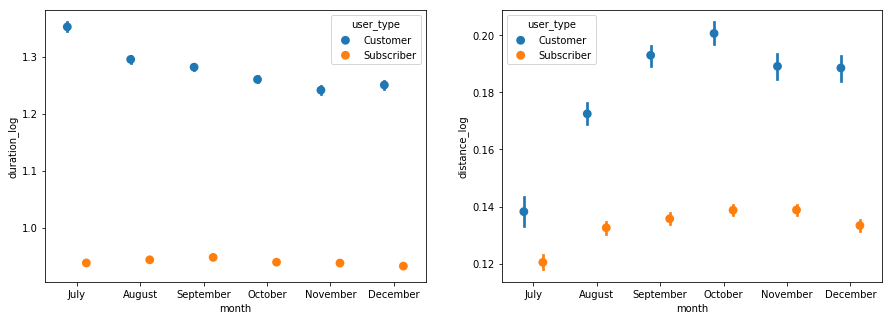

In [100]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'duration_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "", order = month_order)

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'distance_log', hue = 'user_type',
                  dodge = 0.3, linestyles = "", order = month_order);

<span style="color:blue"> Left plot: Mean trip duration is nearly equal across the months in case of subscribers. While it gradually decreases in the case of customers. <br>
    Right plot: Mean trip distance gradually increases in case of subscribers and increases at a greater extent in case of customers. <br>
    This suggests that, as we approach the end of the year, users tend to make more distant trips and the average user speed gradually increases.

<span style="color:blue"> In the previous 3 figures, The mean customer trip duration is constantly higher than that of a subscriber. While the mean customer trip distance is contantly longer. <br>
    This supports our previous observation in the bivariate plots that subscribers on average are faster than customers. It also shows that they tend to make shorter trips on average too.
    

### <span style="color:blue"> Day/Hour:

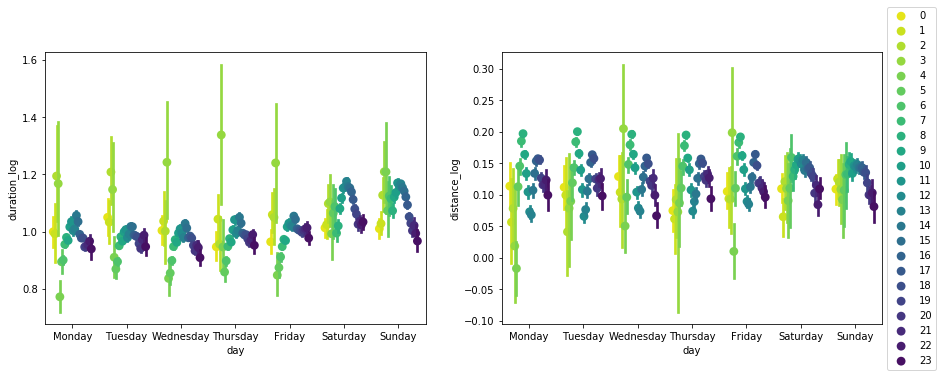

In [101]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'day', y = 'duration_log', hue = 'hour', order = day_order, hue_order = hour_order, 
                  palette = 'viridis_r', dodge = 0.7, linestyles = "" )
plt.legend().remove()

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'day', y = 'distance_log', hue = 'hour', order = day_order, hue_order = hour_order, 
                  palette = 'viridis_r', dodge = 0.7, linestyles = "" )
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> Left plot: Like we observed before, The mean trip duration is longer during weekends. <br> The first hours of weekdays show longer trip durations than the rest of those days. <br> The mean duration in each day follows a curve where mean duration graudally increases in the first half of the day and gradually decreases in the second half of the day. <br>
    Right plot: Like we observed before,The bi-modal hour curve can be observed during weekdays while the weekends show a normal distribution curve. 

### <span style="color:blue"> Month/Hour:

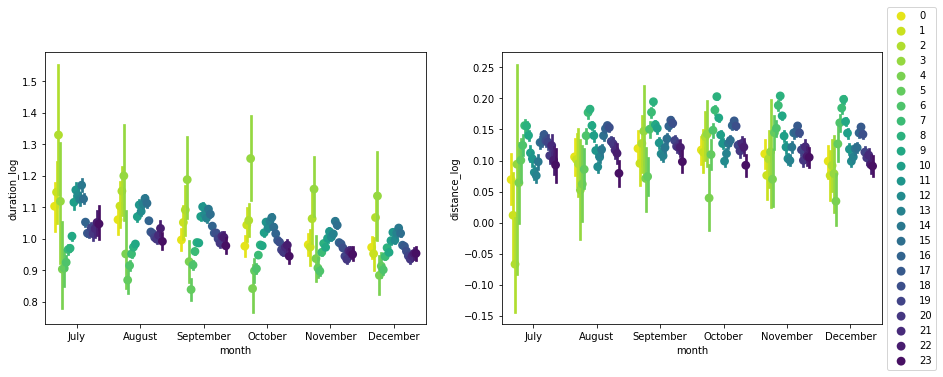

In [102]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'duration_log', hue = 'hour',  order = month_order, hue_order = hour_order, 
                  palette = 'viridis_r', dodge = 0.7, linestyles = "")
plt.legend().remove()

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'distance_log', hue = 'hour', order = month_order, hue_order = hour_order, 
                  palette = 'viridis_r', dodge = 0.7, linestyles = "")
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> Left plot: The deviation in mean trip durations across different hours decreases as we approach the end of the year. This is specially more obvious in trips that started at the first half of the day. In December, Mean trip durations don't deviate much from 10 minutes. <br> The mean duration in each month follows a curve where mean duration graudally increases in the first half of the day and gradually decreases in the second half of the day. <br>
    Right plot: The bi-modal hour curve can be observed. It doesn't seem to differ much across different months.

### <span style="color:blue"> Month/Day:

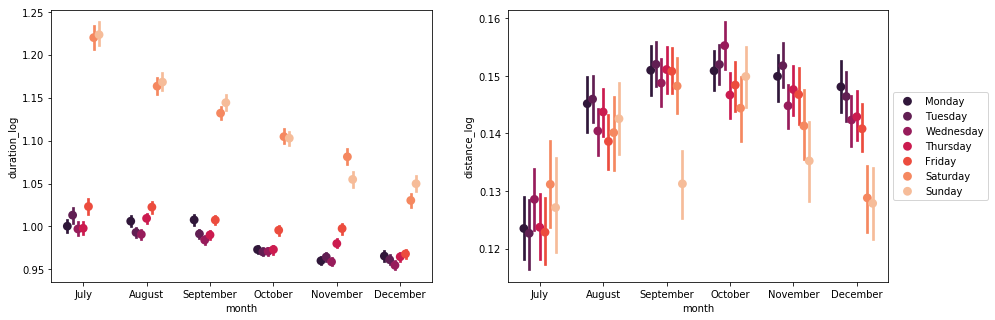

In [103]:
plt.figure(figsize = [15, 5])

# left:
plt.subplot(1, 2, 1)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'duration_log', hue = 'day', order = month_order, hue_order = day_order, 
                  palette = 'rocket', dodge = 0.5, linestyles = "" )
plt.legend().remove()

# right: 
plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df_leave, x = 'month', y = 'distance_log', hue = 'day', order = month_order, hue_order = day_order,
                  palette = 'rocket', dodge = 0.5, linestyles = "" )
plt.legend(loc = 6, bbox_to_anchor = (1,0.5) );

<span style="color:blue"> Left plot: Mean trip duration on each weekday decreases as we approach the end of the year. And this is much more evident in trips made during weekends. <br>
    Right plot: Mean trip distance follows a curve where the longest trip distances are made during the months of September and October. There is also an outlier at the month of September where mean trip distance at Sundays was much shorter. Mean trip distance in weekends during November and December are also shorter than the rest of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The mean customer trip duration is constantly higher than that of a subscriber. While the mean customer trip distance is contantly longer.<br>
This supports our previous observation in the bivariate plots that subscribers on average are faster than customers. It also shows that they tend to make shorter trips on average too.<br>

### Were there any interesting or surprising interactions between features?

> The average user speed is higher during rush hours where the mean trip distance increases but the mean duration doesn't increase to the same degree. <br>
> In weekends, Both types of users make shorter trips but take more time on average. This might be due to that these trips are probably outings.<br>
> As we approach the end of the year, Both types of users tend to make more distant trips and the average user speed gradually increases.<br>
> Mean trip duration on each weekday decreases as we approach the end of the year. And this is much more evident in trips made during weekends.<br>